<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

from scipy.stats import ttest_ind
RANDOM = 12345

Первое знакомство с датасетами

In [2]:
train = pd.read_csv('/datasets/gold_industry_train.csv')
test = pd.read_csv('/datasets/gold_industry_test.csv')
full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
train.head(5)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [4]:
test.head(5)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [5]:
full.head(5)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


Смысла выводить все столбцы нет, а рассмотреть распределение каждого столбца и его название надо

In [6]:
train.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate

- rougher - флотация
- primary - первичная очистака
- secondary - вторичная
- fianl - наш итог

Эти этапы разделяются на другие разные этапы(данные о исходных данных какого-либо сырья, объем воздуха и тд), причем каждый след этап теряет один из подэтапов. Например на этапе final у нас есть только пораметры продуктов(output) для разых металлов и их хвосты. На этапе второй очистки у нас есть данные о хвостах после этой очистки и информация о текущем состоянии металлов, где указан уровень жидкости и объем воздуха. 

 **Проверю**, что эффективность обогащения рассчитана правильно. Вычислю её на обучающей выборке для признака rougher.output.recovery. Найду MAE между моими расчётами и значением признака. 
 
Здесь указано, что нас интересует этап флотации. значит ищем нужные данные именно в нем. По формуле имеем:
- C * (F-T)) / (F * (C-T)) * 100%

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [7]:
def recovery(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) /\
        (rougher_input * (rougher_output - rougher_tail)) * 100
    
    
    return recovery

In [8]:
recovery = recovery(
    train['rougher.output.concentrate_au'], 
    train['rougher.input.feed_au'], 
    train['rougher.output.tail_au'],
)
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64

In [9]:
mean_absolute_error(train['rougher.output.recovery'].dropna(), recovery.dropna())


9.83758577644259e-15

Параметр recovery в train не сильно отличается от расчитанных значений по формуле, значит значения расчитаны верно

 **Проанализиру признаки**, недоступные в тестовой выборке.
 
 Заодно познакомимся с данными в тестовом датасете

In [10]:
columns_train = set(train.columns)
columns_test = set(test.columns)
columns_difference = columns_train - columns_test

missing_columns = list(columns_difference)

In [11]:
print(sorted(missing_columns))

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

- Отсутсвует весь этап final, что и понятно ведь это может быть целевым признаком, а это тестовый датасет.
- Отсутсвуют данные о параметрах продукта и расчетных характеристиках. все то что высчитывается (как я понял онлайн метрики)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


Все значения признаков отсутствующих в тестовой выборе типа floatf

**Проведу** предобработку данных.

Столбцы названы верно, посмотрю на пропуски


In [13]:
def find_null(df):
    return  df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

In [14]:
find_null(train)


secondary_cleaner.output.tail_sol           6.310447
rougher.state.floatbank10_e_air             2.942589
rougher.input.floatbank11_xanthate          2.791687
primary_cleaner.output.concentrate_sol      1.817683
final.output.concentrate_sol                1.316963
                                              ...   
primary_cleaner.state.floatbank8_c_air      0.000000
primary_cleaner.state.floatbank8_c_level    0.000000
primary_cleaner.state.floatbank8_d_level    0.000000
primary_cleaner.output.concentrate_au       0.000000
primary_cleaner.state.floatbank8_b_level    0.000000
Length: 87, dtype: float64

In [15]:
train.fillna(method='ffill', inplace=True)
train = train.sort_values('date')

In [16]:
find_null(train)

date                                                  0.0
primary_cleaner.output.tail_sol                       0.0
secondary_cleaner.state.floatbank3_b_level            0.0
secondary_cleaner.state.floatbank3_b_air              0.0
secondary_cleaner.state.floatbank3_a_level            0.0
                                                     ... 
rougher.output.concentrate_au                         0.0
rougher.calculation.au_pb_ratio                       0.0
rougher.calculation.floatbank11_sulfate_to_au_feed    0.0
rougher.calculation.floatbank10_sulfate_to_au_feed    0.0
final.output.tail_sol                                 0.0
Length: 87, dtype: float64

Заполнил предыдущими значениями тк как в ТЗ указано, что данные часто схожи при близком значении даты и времени, а сами значения отсортированы

In [17]:
find_null(test)



secondary_cleaner.state.floatbank2_a_air      2.592593
rougher.input.floatbank11_xanthate            0.946502
rougher.input.feed_size                       0.905350
primary_cleaner.input.xanthate                0.884774
rougher.input.feed_pb                         0.576132
rougher.input.feed_sol                        0.452675
primary_cleaner.input.depressant              0.185185
rougher.input.floatbank11_sulfate             0.164609
rougher.state.floatbank10_e_air               0.144033
rougher.input.feed_rate                       0.082305
rougher.input.floatbank10_sulfate             0.061728
primary_cleaner.state.floatbank8_d_air        0.041152
primary_cleaner.state.floatbank8_c_air        0.041152
primary_cleaner.state.floatbank8_d_level      0.020576
secondary_cleaner.state.floatbank3_a_level    0.020576
secondary_cleaner.state.floatbank2_a_level    0.020576
secondary_cleaner.state.floatbank2_b_air      0.020576
secondary_cleaner.state.floatbank2_b_level    0.020576
secondary_

In [18]:
test.fillna(method='ffill', inplace=True)
test = test.sort_values('date')

In [19]:
find_null(test)


date                                          0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
secondary_cleaner.state.floatbank2_a_air      0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank2_b_air      0.0
secondary_cleaner.state.floatbank2_b_level    0.0
secondary_cleaner.state.floatbank3_a_air      0.0
secondary_cleaner.state.floatbank3_a_level    0.0
secondary_cleaner.state.floatbank3_b_air      0.0
secondary_cleaner.state.floatbank3_b_level    0.0
secondary_cleaner.state.floatbank4_a_air      0.0
secondary_cleaner.state.floatbank4_a_level    0.0
secondary_cleaner.state.floatbank4_b_air      0.0
secondary_cleaner.state.floatbank4_b_level    0.0


In [20]:
find_null(full)

secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
                                              ...   
rougher.output.tail_sol                     0.000000
primary_cleaner.input.feed_size             0.000000
rougher.input.feed_au                       0.000000
primary_cleaner.output.concentrate_au       0.000000
date                                        0.000000
Length: 87, dtype: float64

In [21]:
full.fillna(method='ffill', inplace=True)
full = full.sort_values('date')

In [22]:
find_null(full)

date                                                  0.0
primary_cleaner.output.tail_sol                       0.0
secondary_cleaner.state.floatbank3_b_level            0.0
secondary_cleaner.state.floatbank3_b_air              0.0
secondary_cleaner.state.floatbank3_a_level            0.0
                                                     ... 
rougher.output.concentrate_au                         0.0
rougher.calculation.au_pb_ratio                       0.0
rougher.calculation.floatbank11_sulfate_to_au_feed    0.0
rougher.calculation.floatbank10_sulfate_to_au_feed    0.0
final.output.tail_sol                                 0.0
Length: 87, dtype: float64

In [23]:
train.duplicated().sum()

0

In [24]:
test.duplicated().sum()

0

In [25]:
full.duplicated().sum()

0

In [26]:
def count_outliers(df):
    outliers = {}
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    
    return pd.Series(outliers)


outliers_count = count_outliers(train.drop('date',axis=1)) / train.shape[0] * 100
outliers_count.sort_values()

rougher.state.floatbank10_a_level              0.000000
rougher.state.floatbank10_c_level              0.000000
secondary_cleaner.output.tail_sol              0.006859
rougher.state.floatbank10_d_level              0.013718
primary_cleaner.output.concentrate_sol         0.013718
                                                ...    
primary_cleaner.state.floatbank8_d_level      23.417244
secondary_cleaner.state.floatbank5_a_level    25.228068
secondary_cleaner.state.floatbank3_a_level    25.577886
secondary_cleaner.state.floatbank5_b_level    25.687633
secondary_cleaner.state.floatbank4_a_level    26.229508
Length: 86, dtype: float64

In [27]:
outliers_count = count_outliers(test.drop('date',axis=1)) / test.shape[0] * 100
outliers_count.sort_values()

secondary_cleaner.state.floatbank6_a_air       0.000000
secondary_cleaner.state.floatbank5_a_air       0.000000
rougher.state.floatbank10_a_level              0.000000
rougher.input.feed_ag                          0.041152
secondary_cleaner.state.floatbank4_a_air       0.164609
secondary_cleaner.state.floatbank4_b_air       0.164609
rougher.input.feed_au                          0.185185
primary_cleaner.input.sulfate                  0.226337
rougher.state.floatbank10_a_air                0.246914
rougher.state.floatbank10_c_air                0.267490
rougher.state.floatbank10_b_air                0.411523
rougher.state.floatbank10_d_air                0.411523
secondary_cleaner.state.floatbank3_a_air       0.617284
secondary_cleaner.state.floatbank3_b_air       0.617284
rougher.input.floatbank10_sulfate              0.740741
primary_cleaner.input.depressant               0.864198
rougher.input.floatbank10_xanthate             1.234568
rougher.input.floatbank11_sulfate              1

In [28]:
outliers_count = count_outliers(full.drop('date',axis=1)) / full.shape[0] * 100
outliers_count.sort_values()

rougher.state.floatbank10_a_level              0.000000
rougher.state.floatbank10_c_level              0.000000
secondary_cleaner.output.tail_sol              0.005144
rougher.state.floatbank10_d_level              0.010289
rougher.state.floatbank10_e_level              0.015433
                                                ...    
primary_cleaner.state.floatbank8_d_level      23.920984
secondary_cleaner.state.floatbank5_a_level    24.409692
secondary_cleaner.state.floatbank5_b_level    24.836669
secondary_cleaner.state.floatbank3_a_level    25.083595
secondary_cleaner.state.floatbank4_a_level    25.243068
Length: 86, dtype: float64

Выбросов очень много в некоторых столбцах чтобы их просто удалить. Для начала попробую понять в чем может быть причина просмотрев диапазон случайной велечина

In [29]:
train['secondary_cleaner.state.floatbank4_a_level'].describe()

count    14579.000000
mean      -484.971102
std         48.795359
min       -799.798523
25%       -500.704937
50%       -499.820809
75%       -498.048862
max       -245.239184
Name: secondary_cleaner.state.floatbank4_a_level, dtype: float64

In [30]:
train['secondary_cleaner.state.floatbank5_b_level'].describe()

count    14579.000000
mean      -486.338692
std         38.726292
min       -800.220337
25%       -500.129137
50%       -499.926255
75%       -499.285414
max       -137.740004
Name: secondary_cleaner.state.floatbank5_b_level, dtype: float64

Очень трудно сказать насколько эти значения адекватны, ведь нет предстваления или описания их значения

При работе в компании или имея доступ к владельцу датасета можно было бы посоветоваться с ним, однако тут такой возможности нет, а значит и точных выводох делать не стану. Решил выбросы не трогать, но показать, что тут они имеется.

Покажу наглядно

**Вывод**

- В данных есть выбросы, который я решил не удалять из-за отсутсвия описания случайной велечины
- Дубликаты не обнаружены
- Пропуски были замены на соседнее значение основываясь на ТЗ
- При проверки формулы с помощью MAE можно сказать, что она хорошо работает

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть промежуточный вывод - отлично!

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Попробую показать какие особенности имеют распределения


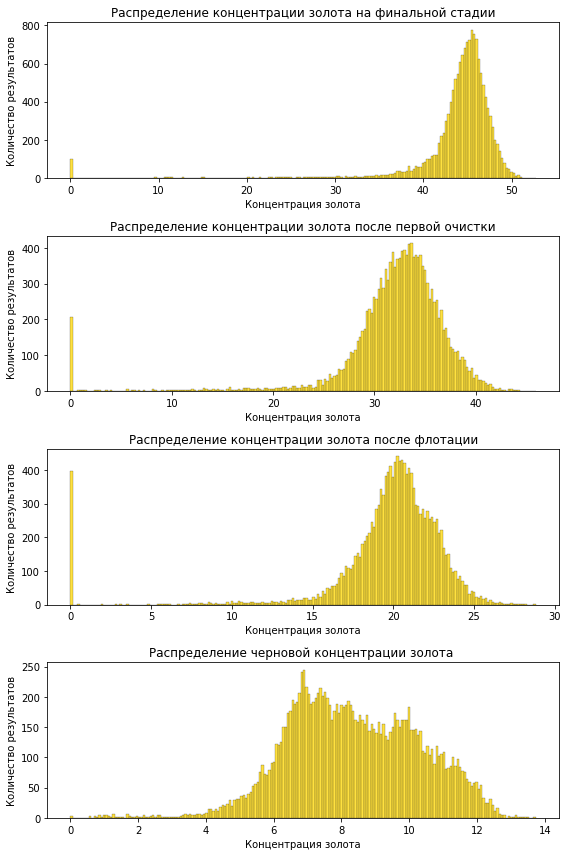

In [31]:
fig, axes = plt.subplots(4, 1, figsize=(8, 12))


sns.histplot(data=train, x='final.output.concentrate_au', ax=axes[0], color='gold', bins=200)
axes[0].set_title('Распределение концентрации золота на финальной стадии')
axes[0].set_xlabel('Концентрация золота')
axes[0].set_ylabel('Количество результатов')

sns.histplot(data=train, x='primary_cleaner.output.concentrate_au', ax=axes[1], color='gold', bins=200)
axes[1].set_title('Распределение концентрации золота после первой очистки')
axes[1].set_xlabel('Концентрация золота')
axes[1].set_ylabel('Количество результатов')

sns.histplot(data=train, x='rougher.output.concentrate_au', ax=axes[2], color='gold', bins=200)
axes[2].set_title('Распределение концентрации золота после флотации')
axes[2].set_xlabel('Концентрация золота')
axes[2].set_ylabel('Количество результатов')

sns.histplot(data=train, x='rougher.input.feed_au', ax=axes[3], color='gold', bins=200)
axes[3].set_title('Распределение черновой концентрации золота ')
axes[3].set_xlabel('Концентрация золота')
axes[3].set_ylabel('Количество результатов')

plt.tight_layout()
plt.show()

По графику видно, что с каждым шагом очистки коэффициент увеличивается и все чаще встречается больший результат

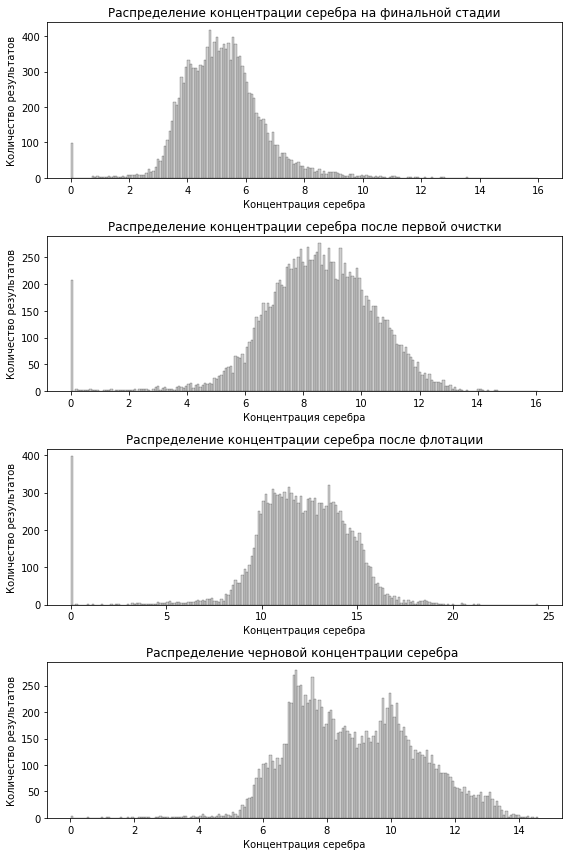

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(8, 12))


sns.histplot(data=train, x='final.output.concentrate_ag', ax=axes[0], color='silver', bins=200)
axes[0].set_title('Распределение концентрации серебра на финальной стадии')
axes[0].set_xlabel('Концентрация серебра')
axes[0].set_ylabel('Количество результатов')

sns.histplot(data=train, x='primary_cleaner.output.concentrate_ag', ax=axes[1], color='silver', bins=200)
axes[1].set_title('Распределение концентрации серебра после первой очистки')
axes[1].set_xlabel('Концентрация серебра')
axes[1].set_ylabel('Количество результатов')

sns.histplot(data=train, x='rougher.output.concentrate_ag', ax=axes[2], color='silver', bins=200)
axes[2].set_title('Распределение концентрации серебра после флотации')
axes[2].set_xlabel('Концентрация серебра')
axes[2].set_ylabel('Количество результатов')

sns.histplot(data=train, x='rougher.input.feed_ag', ax=axes[3], color='silver', bins=200)
axes[3].set_title('Распределение черновой концентрации серебра ')
axes[3].set_xlabel('Концентрация серебра')
axes[3].set_ylabel('Количество результатов')

plt.tight_layout()
plt.show()

У серебра наоборот, финальный резульат левее, что говорит о более редих случаях, когда его коэф. большой.

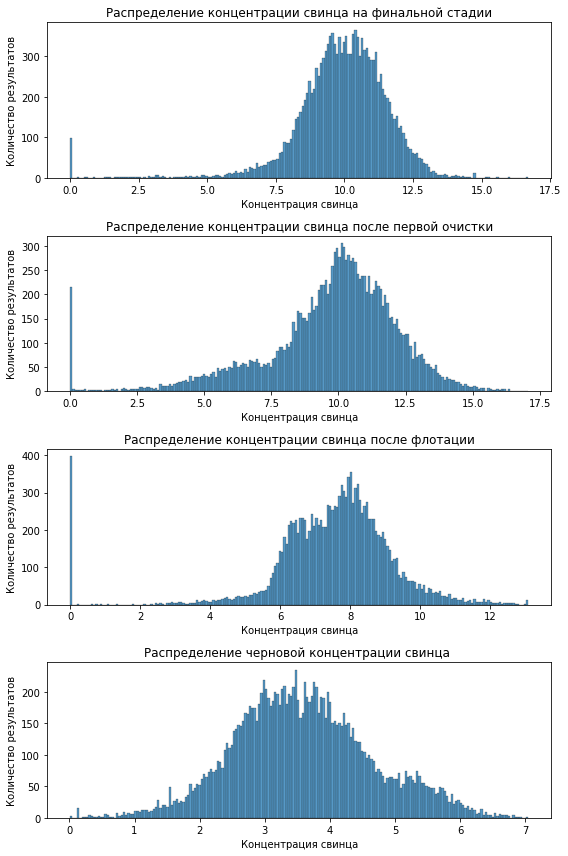

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(8, 12))


sns.histplot(data=train, x='final.output.concentrate_pb', ax=axes[0], bins=200)
axes[0].set_title('Распределение концентрации свинца на финальной стадии')
axes[0].set_xlabel('Концентрация свинца')
axes[0].set_ylabel('Количество результатов')

sns.histplot(data=train, x='primary_cleaner.output.concentrate_pb', ax=axes[1], bins=200)
axes[1].set_title('Распределение концентрации свинца после первой очистки')
axes[1].set_xlabel('Концентрация свинца')
axes[1].set_ylabel('Количество результатов')

sns.histplot(data=train, x='rougher.output.concentrate_pb', ax=axes[2], bins=200)
axes[2].set_title('Распределение концентрации свинца после флотации')
axes[2].set_xlabel('Концентрация свинца')
axes[2].set_ylabel('Количество результатов')

sns.histplot(data=train, x='rougher.input.feed_pb', ax=axes[3], bins=200)
axes[3].set_title('Распределение черновой концентрации свинца ')
axes[3].set_xlabel('Концентрация свинца')
axes[3].set_ylabel('Количество результатов')

plt.tight_layout()
plt.show()

Распределение по значениям похоже на серебро, однако финальный результат тут явно лучше, чем черновой

Уберу аномалии, где концетрат материала равен 0

In [34]:
columns = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol',
          'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_au',
           'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',]


for column in columns:
    train = train.loc[train[column] >= 1]

**Сравню** распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Буду использовать ttest, для этого составлю гипотезы
- Нулевая распределения гранул исходного сырья в тестовой и обучающей выборке равны
- Альтернативная  распределения гранул исходного сырья в тестовой и обучающей выборке не равны равны

Значение t-статистики: -0.1688976410172656
Значение p-value: 0.8658789954695579
Различие в распределениях не является статистически значимым


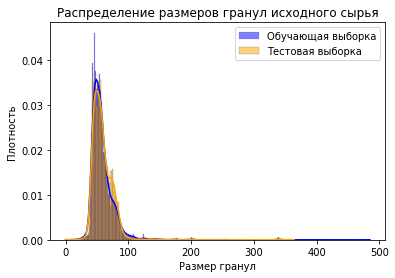

In [35]:
sns.histplot(train['rougher.input.feed_size'], kde=True, label='Обучающая выборка', stat='density', color='blue')


sns.histplot(test['rougher.input.feed_size'], kde=True, label='Тестовая выборка', stat='density', color='orange')


plt.xlabel('Размер гранул')
plt.ylabel('Плотность')
plt.title('Распределение размеров гранул исходного сырья')
plt.legend()


t_stat, p_value = ttest_ind(train['rougher.input.feed_size'], test['rougher.input.feed_size'])
print('Значение t-статистики:', t_stat)
print('Значение p-value:', p_value)


if p_value < 0.05:
    print('Различие в распределениях статистически значимо')
else:
    print('Различие в распределениях не является статистически значимым')


plt.show()

Существует много выбросов после размера гранул 100.
Сами распределения схожи, только в обучающей график выше, что говорит о большем кол-во признаков в ней

**Итог** По графикам видно, что распределения размеров гранул сырья на обучающей и тестовой выборках совпадают, а значит оценка модели будет правильной это же подтверждает ттест, а именно, тк p_value не привысило порог, у нас нет оснований отвергать нулевую гипотезу

**Исследуем** суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [36]:
final_output_concentrate_sum = (train['final.output.concentrate_au'] + train['final.output.concentrate_ag'] + 
train['final.output.concentrate_pb'] + train['final.output.concentrate_sol'])

primary_cleaner_output_concentrate_sum = (train['primary_cleaner.output.concentrate_au'] + 
train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] +
train['primary_cleaner.output.concentrate_sol'])

rougher_output_concentrate_sum = ( train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_ag'] + 
train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_sol'])

rougher_input_concentrate_sum = ( train['rougher.input.feed_au'] + train['rougher.input.feed_ag'] +
 train['rougher.input.feed_pb'] + train['rougher.input.feed_sol']
)

In [37]:
final_output_concentrate_sum.describe()

count    13700.000000
mean        69.229338
std          5.068861
min         11.843228
25%         68.117128
50%         69.713506
75%         71.470065
max         80.210644
dtype: float64

In [38]:
primary_cleaner_output_concentrate_sum.describe()

count    13700.000000
mean        61.698255
std          7.018517
min          8.147616
25%         59.223846
50%         62.599576
75%         65.792401
max         78.255313
dtype: float64

In [39]:
rougher_output_concentrate_sum.describe()

count    13700.000000
mean        69.834440
std          7.585509
min         11.170072
25%         66.573793
50%         70.643016
75%         74.689173
max         88.140119
dtype: float64

In [40]:
rougher_input_concentrate_sum.describe()

count    13700.000000
mean        57.568700
std          7.002392
min         10.936233
25%         53.705237
50%         57.796186
75%         62.181023
max         76.978947
dtype: float64

**Вывод**

Были удалены некторые аномалии, к котором нашелся повод для удаления. После изучения распределений гранул можно сказать, что данные готовы для применения машинного обучения

## Модель

Для начала надо из train откинуть те признаки, которых нет в test, тк модель будет проверяться на test'е, и обучаться она должна с теми же признаками для повешения уверенности в правильности предсказания

Но в test необходимо добавить целевые признаки

In [41]:
merged_test = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')


In [42]:
merged_test.shape

(4860, 55)

In [43]:
columns_train = set(train.columns)
columns_test = set(merged_test.columns)
columns_difference = columns_train - columns_test

missing_columns = list(columns_difference)
missing_columns

['secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_sol',
 'final.output.tail_sol',
 'rougher.output.tail_au',
 'final.output.concentrate_ag',
 'final.output.tail_au',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_sol',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_ag',
 'final.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_pb',
 'secondary_cleaner.output.tail_au',
 'final.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'final.output.concentrate_au',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.c

In [44]:
train.drop(missing_columns, axis=1, inplace=True)

In [45]:
train.shape

(13700, 55)

In [46]:
train.drop('date',axis=1, inplace=True)

In [47]:
merged_test.drop('date',axis=1, inplace=True)

Отлично. тк все значения и так не object и не качественные, то применять техники для перевода в непрерывные переменные не нужно.

 **Напишиму** функцию для вычисления итоговой sMAPE.

In [48]:
def calculate_smape(target_actual, target_predictions): # это метрика качества
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 

In [49]:
def calculate_final_smape(target_actual, target_predictions): # итоговая метрика качества
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_rougher, target_predictions_rougher)

**Обучаем** разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.

In [50]:
train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,...,13700.000000,1.370000e+04,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8.395762,8.897935,3.604403,36.670599,476.652522,59.074041,12.451068,6.037731,1103.066830,-379.978210,...,-484.473834,1.484935e+01,-459.897640,15.420235,-487.422283,11.957600,-485.855782,19.038730,-505.446035,67.407986
std,1.879619,1.904116,1.054023,5.043898,106.105045,22.850305,3.324560,1.109654,161.465057,94.694850,...,48.957801,4.854487e+00,66.629982,5.381537,35.293670,5.216459,38.277730,5.515845,36.995058,8.723173
min,0.943717,2.215688,0.125889,0.463867,0.002986,0.049194,0.001164,0.000568,-0.042069,-657.949759,...,-799.798523,2.489718e-17,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,0.463711
25%,6.952363,7.343107,2.888156,34.135913,417.947644,47.347545,10.008514,5.399076,999.640878,-499.875923,...,-500.700703,1.191282e+01,-500.183062,10.980352,-500.446469,8.943932,-500.128465,14.988116,-500.751787,63.568302
50%,8.267599,8.759738,3.530257,37.128656,498.737022,54.495978,12.004640,6.036852,1000.966633,-300.323944,...,-499.817110,1.495765e+01,-499.421466,14.968392,-499.768801,11.005696,-499.926390,19.974256,-500.052041,68.141142
75%,9.850844,10.270294,4.260709,39.970338,549.676821,64.326365,14.936382,6.799073,1230.739894,-299.989400,...,-497.978456,1.791359e+01,-400.091758,18.013377,-498.072561,14.000557,-499.241210,23.449746,-499.502812,72.645571
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,-245.239184,2.400791e+01,-7.834746,43.709931,-244.483566,24.803684,-137.740004,32.188906,-123.307487,100.000000


Видно, что разные признаки имеют разные минимальные, средний и макс значения. есть среднее равно 8, а есть и 1000+ и даже отрицательные -484

Лучше попробовать провести масштабирование признаков. Оно проводится только на обучающей выборке, чтобы избежать слива тестовых данных для моделей

Теперь можно приступить к обучению моделей

In [51]:

train_features = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_target = train[['rougher.output.recovery', 'final.output.recovery']]

test_features = merged_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
test_target = merged_test[['rougher.output.recovery', 'final.output.recovery']]

In [52]:
max_depth_values = [2, 5, 7]
min_samples_split_values = [2, 4, 6]


In [67]:
scorer = make_scorer(calculate_final_smape, greater_is_better=False)

best_score = float('inf')

pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=RANDOM))

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        pipeline.named_steps['decisiontreeregressor'].set_params(max_depth=max_depth, min_samples_split=min_samples_split)
        scores = cross_val_score(pipeline, train_features, train_target, cv=5, scoring=scorer)
        mean_score = -scores.mean()
        
        if mean_score < best_score:
            best_score = mean_score
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

print('Лучшие значения гиперпараметров:', best_params)
print('Лучшее значение sMAPE:', best_score)





Лучшие значения гиперпараметров: {'max_depth': 2, 'min_samples_split': 2}
Лучшее значение sMAPE: 6.946630519818285


In [70]:
max_depth_values = [10, 15, 20, 30]
n_estimators_values = [5, 10, 15, 20]

scoring = make_scorer(calculate_final_smape, greater_is_better=False)

best_score = float('inf') 
best_params = {}

pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=RANDOM))

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        pipeline.named_steps['randomforestregressor'].set_params(max_depth=max_depth, n_estimators=n_estimators)
        scores = cross_val_score(pipeline, train_features, train_target, cv=5, scoring=scoring, n_jobs=-1)
        mean_score = -scores.mean()
        
        if mean_score < best_score:
            best_score = mean_score
            best_params = {'max_depth': max_depth, 'n_estimators': n_estimators}

print('Лучшие значения гиперпараметров:', best_params)
print('Лучшее значение sMAPE:', best_score)


Лучшие значения гиперпараметров: {'max_depth': 15, 'n_estimators': 20}
Лучшее значение sMAPE: 6.76956889100938


In [53]:
scoring = make_scorer(calculate_final_smape, greater_is_better=False)

lasso_pipeline = make_pipeline(StandardScaler(), Lasso(random_state=RANDOM))
alpha_values = [0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0]

best_alpha = None
best_score = float('inf')

for alpha in alpha_values:
    lasso_pipeline.named_steps['lasso'].set_params(alpha=alpha)
    
    scores = cross_val_score(lasso_pipeline, train_features, train_target, cv=5, scoring=scoring, n_jobs=-1)
    mean_score = -scores.mean()
    
    if mean_score < best_score:
        best_score = mean_score
        best_alpha = alpha

print(f"Лучший гиперпараметр alpha={best_alpha}")
print(f"Лучшая средняя ошибка: {best_score}")


Лучший гиперпараметр alpha=1.0
Лучшая средняя ошибка: 6.277892924357717


In [78]:
scoring = make_scorer(calculate_final_smape, greater_is_better=False)

ridge_pipeline = make_pipeline(StandardScaler(), Ridge(random_state=RANDOM))
alpha_values = [0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0]

best_alpha = None
best_score = float('inf')

for alpha in alpha_values:
    ridge_pipeline.named_steps['ridge'].set_params(alpha=alpha)
    
    scores = cross_val_score(ridge_pipeline, train_features, train_target, cv=5, scoring=scoring, n_jobs=-1)
    mean_score = -scores.mean()
    
    if mean_score < best_score:
        best_score = mean_score
        best_alpha = alpha

print(f"Лучший гиперпараметр alpha={best_alpha}")
print(f"Лучшая средняя ошибка: {best_score}")


Лучший гиперпараметр alpha=50.0
Лучшая средняя ошибка: 7.030360799279855


In [54]:

scoring = make_scorer(calculate_final_smape, greater_is_better=False)

linear_pipeline = make_pipeline(StandardScaler(), LinearRegression())


scores = cross_val_score(linear_pipeline, train_features, train_target, cv=5, scoring=scoring, n_jobs=-1)


mean_score = -scores.mean()

print(f"Средняя ошибка: {mean_score}")

Средняя ошибка: 7.105752901688177


Лучшая модель после обучаения окозалась модель Lasso, онра показала наименьший показатель ошибки, а значит ее я проверю на тетсовых значениях

In [56]:
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=1.0, random_state=RANDOM))


lasso_pipeline.fit(train_features, train_target)


predictions = lasso_pipeline.predict(test_features)


score = calculate_final_smape(test_target, predictions)
score

4.944944528469071

In [57]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(train_features, train_target)


dummy_predictions = dummy_model.predict(test_features)


dummy_score = calculate_final_smape(test_target, dummy_predictions)


best_model_score = calculate_final_smape(test_target, predictions)

# Вывод результатов
print(f"Качество константной модели: {dummy_score}")
print(f"Качество лучшей модели: {best_model_score}")


Качество константной модели: 6.058287765031783
Качество лучшей модели: 4.944944528469071


Модель прошла проверку на адекватность

**Итог проекта**

- Данные были рассмотрены во всех 3 датасетах:
    - Были обнаружены пропуски, они были устранены пред. значениями, тк данные по заданию схожи при близких датат, а сами они сортированы
    - Дубликатов нет
    - Были обнаружены выбросы, удалил те, аномалию которых я смог подтвердить, остальные без четкого понимания что это за данные трогать не стал
- Изучил распределение данных:
    - Наибольший концетрат у золота на финальном этапе, сам он растет с каждым этапом
    - Свинец придерживается того же результата
    - У серебра наоборот, на финальном этапе он меньше всего
    - Гранулы сырья на всех этапах распределены одинаково, разница в графиках лишь в высоте, но она такого только из-за большего кол-ва данных в train, чем в test
- Подготовил данные для обучения модели и обучил модель:
    - Для начала я добавил в test целевые признаки из full датасета по датам
    - Удалил все лишнее признаки(которых нет в test) из train
    - Признаки имеют разные диапазон, я их масштабировал
    - Для обучения построил 5 моделей:
        - Дерево решений
        - Случайный лес
        - Линейная регрессия
        - Lasso
        - Ridge
    - Лучший результат при обучении показала модель lasso с параметром alpha 1.0
    - На тестовой выборке sMAPE(пользовательская метрика из ТЗ) показала результат 6.646, где близость к 1 показывает хорошую работу модели